## ZAHRA SEVILLA
## 4112321033

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data22 = pd.read_csv("2022.csv")
data22

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...,...
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"


## DATASET

RANK -> nomor dalam peringkat negara.

Country -> negara yang diteliti.

Happiness score -> sebuah indeks yang mencerminkan kesejahteraan masyarakat dan keadaan lingkungan di berbagai negara di dunia, yang diusulkan oleh New Economics Foundation pada Juli 2006.

Whisker-high and Whisker-low : Whisker (low) adalah kuartil (bilangan nyata antara 0 dan 10) yang menjadi dasar penghitungan skor kebahagiaan.

Dystopia (1.83) + residual 

Explained by: GDP per capita adalah rasio PDB terhadap jumlah penduduk suatu negara, yang menunjukkan berapa banyak produk bruto yang diproduksi di suatu negara dalam setahun dan dinyatakan dalam nilai, yang dipertanggungjawabkan oleh satu penduduk negara tersebut.

Explained by: Social support is adalah suatu bentuk ekspresi kebijakan sosial negara yang bertujuan untuk memberikan bantuan sosial kepada warga negara yang membutuhkan.

Explained by: Healthy life expectancy -> Angka harapan hidup sehat merupakan indikator untuk menghitung berapa angka harapan hidup yang harus disesuaikan dengan kesehatan individu. Indikator ini mewakili periode waktu (tahun, bulan, hari) dimana seseorang diharapkan mempunyai kondisi kesehatan tertentu, dengan tingkat mortalitas dan morbiditas yang konstan.

Explained by: Freedom to make life choices -> hak seseorang untuk bebas menyatakan pendapatnya. Hak ini mencakup kebebasan untuk mempunyai pendapat dan kebebasan untuk menerima dan menyampaikan informasi dan gagasan tanpa adanya campur tangan dari otoritas publik dan tanpa memandang batas-batas.

Explained by: Generosity -> The main feature of charity is adalah pilihan sukarela atas jenis, waktu dan tempat, serta isi bantuan (yang ditargetkan). Charity dibedakan sebagai wujud kasih sayang terhadap sesama dan kewajiban moral pemilik untuk bergegas membantu mereka yang tidak punya.

Explained by: Perceptions of corruption -> sebuah indeks yang disusun oleh organisasi non-pemerintah internasional Transparansi Internasional untuk mencerminkan penilaian tingkat persepsi korupsi oleh para analis dan pengusaha pada skala 100 poin. Disusun setiap tahun sejak 1995.

In [4]:
data22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

In [7]:
# mendapatkan kolom `object`
obj_col = data22.select_dtypes(include=['O']).columns
# Mendapatkan semua kolom kecuali 'RANK' dan 'Country'
columns = [col for col in obj_col if col not in ['RANK', 'Country']]
# Convert kolom numeric yang awalnya `object` menjadi `float`
for col in columns:
    data22.loc[:, col] = data22[col].str.replace(',', '.').astype(float)

C:\Users\Zahra Sevilla\AppData\Local\Temp\ipykernel_7572\1644947128.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data22.loc[:, col] = data22[col].str.replace(',', '.').astype(float)


In [9]:
data22.drop('RANK',axis=1,inplace=True)
data22

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...
142,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005


In [11]:
data22.describe()

,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.553575,5.673589,5.433568,1.831808,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781
std,1.086843,1.065621,1.109380,0.534994,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514
min,2.404000,2.469000,2.339000,0.187000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.888750,5.006250,4.754750,1.555250,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250
50%,5.568500,5.680000,5.453000,1.894500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500
75%,6.305000,6.448750,6.190000,2.153000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500
max,7.821000,7.886000,7.756000,2.844000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000


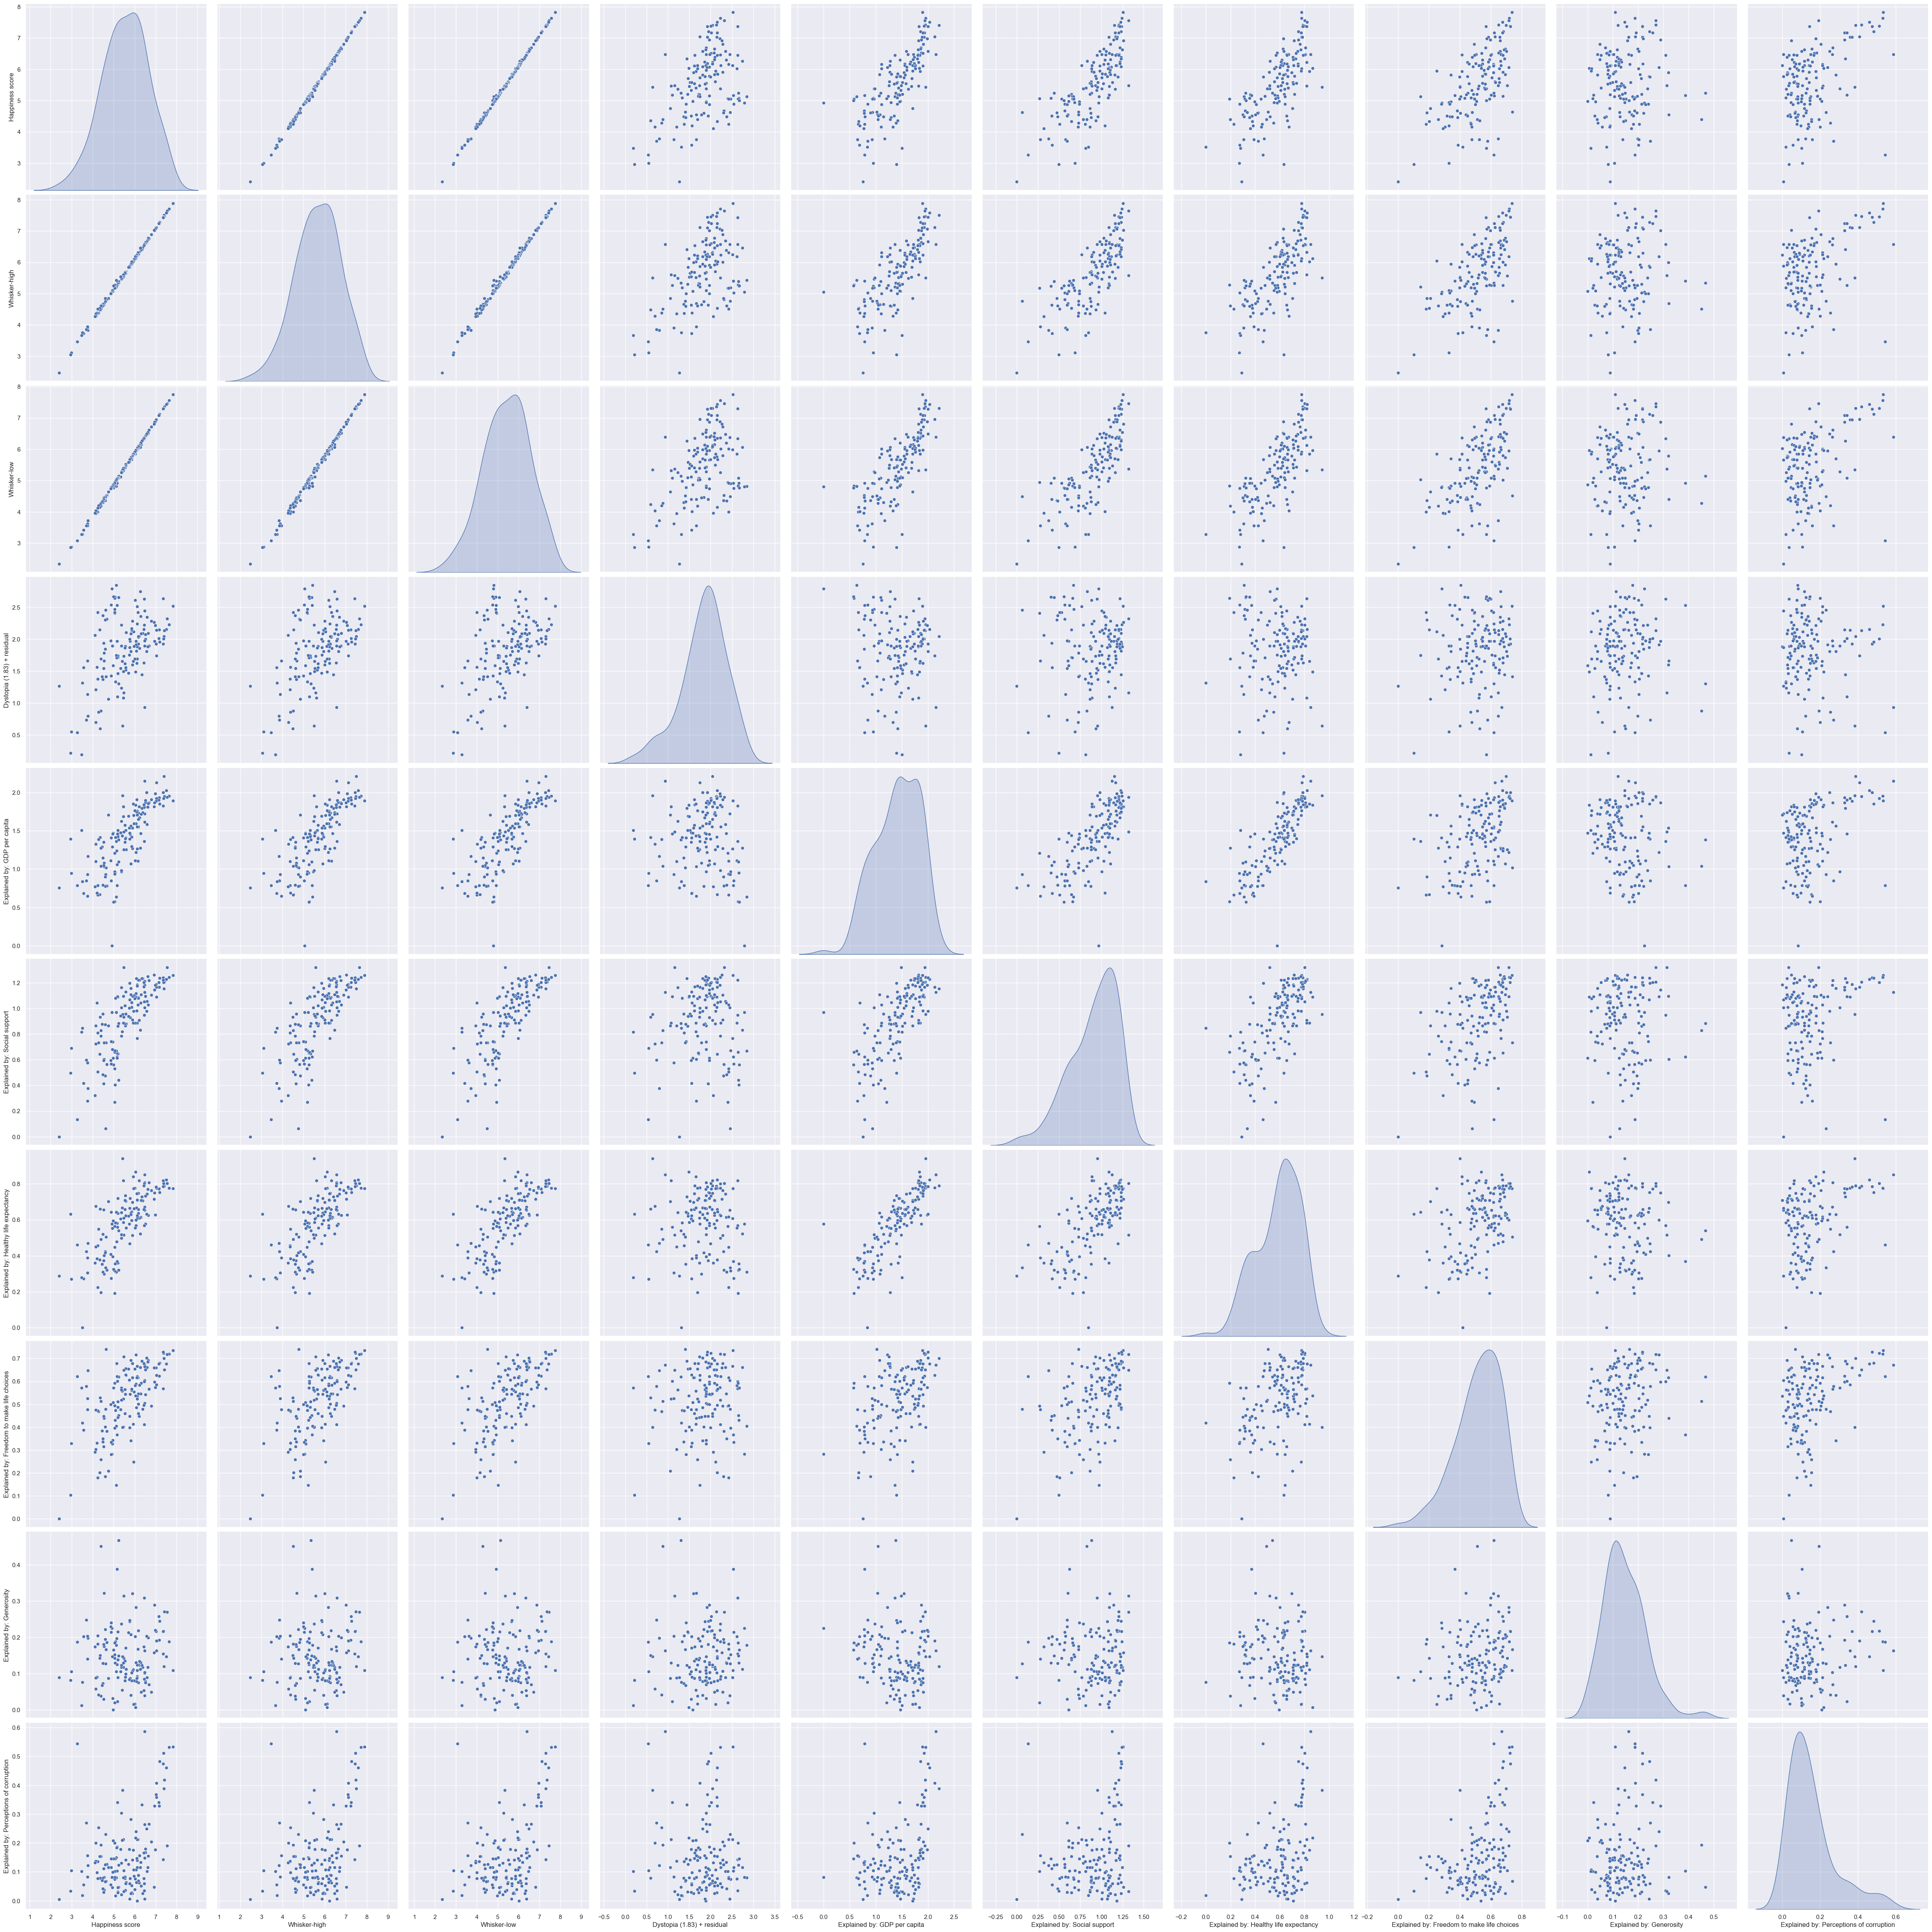

In [15]:
sns.set()
sns.pairplot(data22,height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

In [16]:
data22.columns

Index(['Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [17]:
numeric_features=['Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption']

In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = make_subplots(rows=len(numeric_features), cols=3)

i = 1
for feature in numeric_features:
    fig.add_trace(go.Histogram(x=data22[feature], name=feature), row=i, col=1)
    fig.add_trace(go.Box(x=data22[feature], name=feature), row=i, col=2)
    fig.add_trace(go.Violin(x=data22[feature], name=feature), row=i, col=3)
    i += 1

fig.update_layout(height=2400, width=1800, title_text='<b>Continuous distributions', title_x=0.5)
fig.show()


Hipotesis: Sebagian besar data tidak terdistribusi sesuai dengan hukum distribusi normal, dan terdapat juga minor outlier untuk setiap fitur.

In [24]:
for feature in numeric_features:
  top10 = data22.nlargest(10,feature).sort_values(by=feature)
  fig_bar = px.bar(x = top10['Country'], y = top10[feature])
  fig_bar.update_layout(width = 1000, height = 500, title_text=f"TOP 10 country by {feature}")
  fig_bar.update_xaxes(title = 'Country')
  fig_bar.update_yaxes(title = f'{feature}')
  fig_bar.show()

In [21]:
import plotly.express as px
for feature in numeric_features:  
  fig = px.scatter(data22, x='Happiness score',y=feature)
  fig.update_layout(title=f"Scatter plot Happiness score with {feature}")
  fig.show()

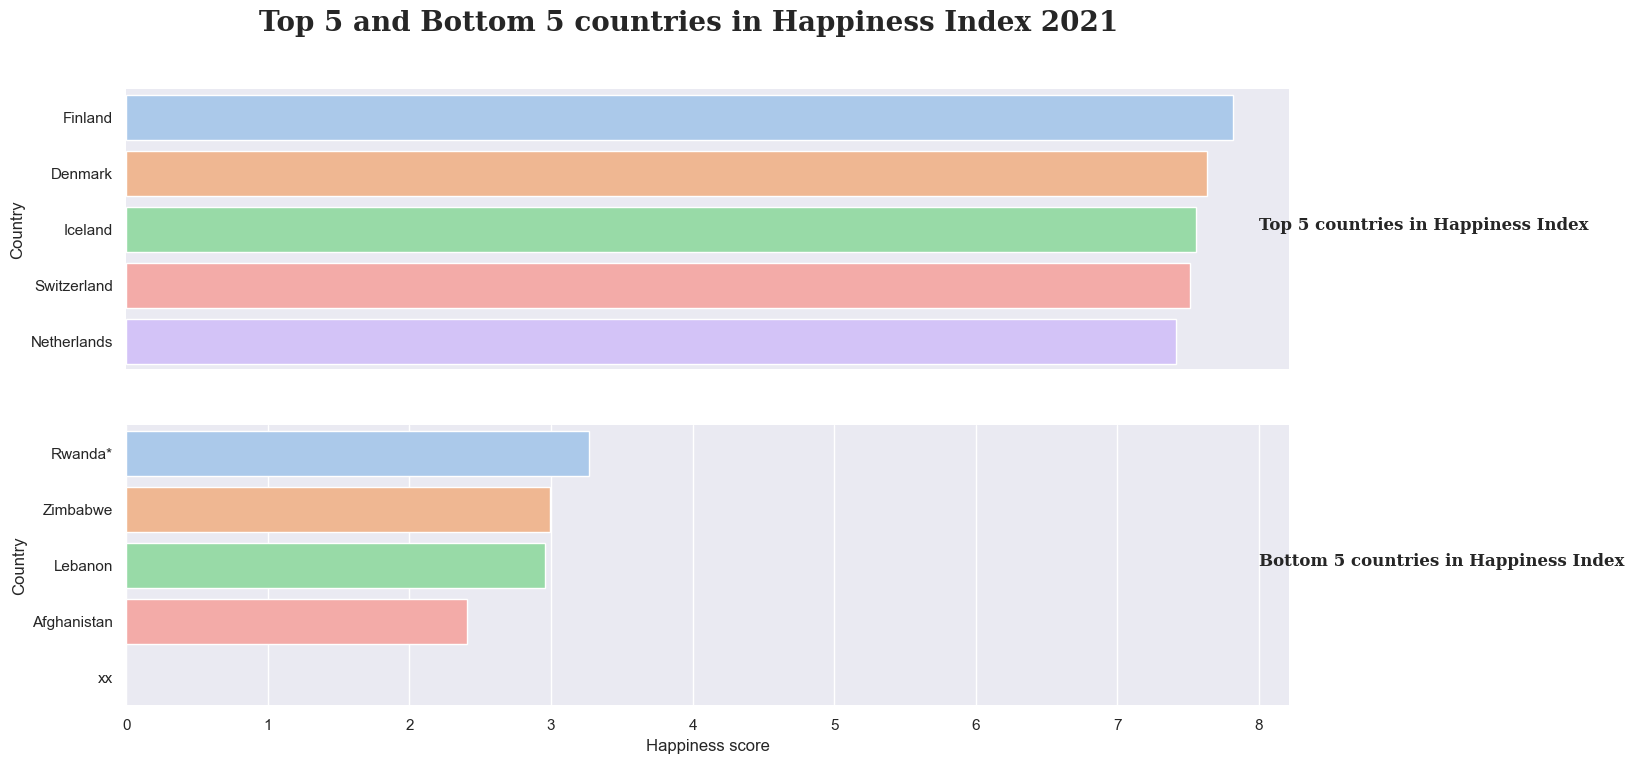

In [32]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

# Definisi warna menggunakan palet seaborn
palette = sns.color_palette("pastel")

# Top 5 dan bottom 5 negara dalam laporan 2021
fig = plt.figure(figsize=(15, 8))
g = gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 5 and Bottom 5 countries in Happiness Index 2021", family='Serif', weight='bold', size=20)

ax1 = plt.subplot(g[0, 0])
top_5 = data22.head(5)
bot_5 = data22.tail(5)
ax1 = sns.barplot(data=top_5, x=top_5['Happiness score'], y=top_5['Country'], palette=palette)
ax1.xaxis.set_visible(False)
ax1.annotate("Top 5 countries in Happiness Index", xy=(8, 2), family='Serif', weight='bold', size=12)

ax2 = plt.subplot(g[1, 0], sharex=ax1)
ax2 = sns.barplot(data=bot_5, x=bot_5['Happiness score'], y=bot_5['Country'], palette=palette)
ax2.annotate("Bottom 5 countries in Happiness Index", xy=(8, 2), family='Serif', weight='bold', size=12)

for s in ['left', 'right', 'top', 'bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

plt.show()


In [47]:
import plotly.express as px

# Membuat peta choropleth
fig = px.choropleth(data22, 
                    locations="Country", 
                    locationmode='country names',
                    color="Happiness score", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Peta Choropleth Skor Kebahagiaan di Seluruh Dunia")
fig.show()

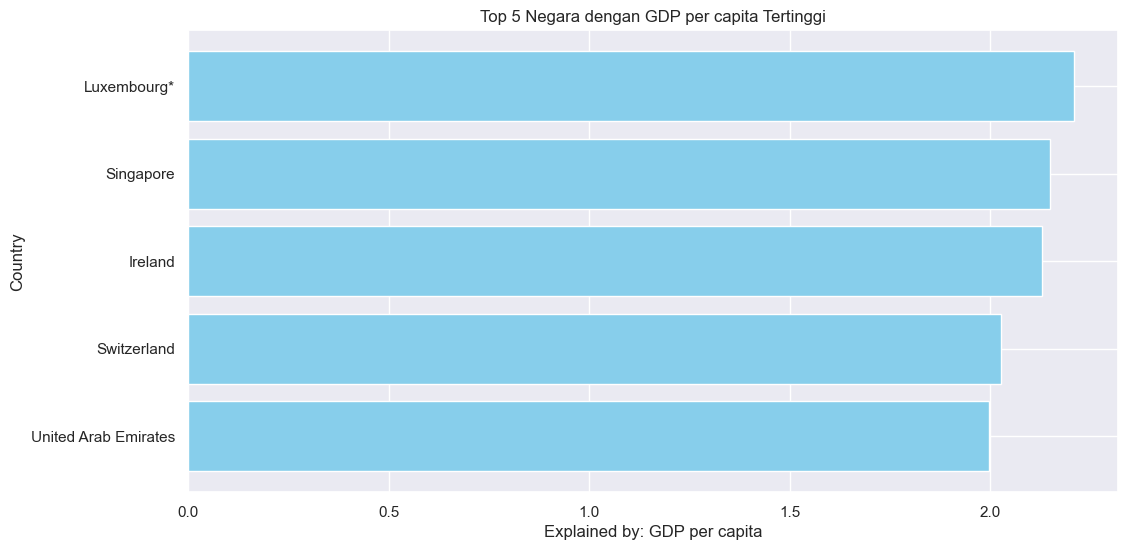

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Menemukan negara-negara dengan GDP per capita tertinggi
top_gdp_countries = data22.nlargest(5, 'Explained by: GDP per capita')

# Membuat barplot
plt.figure(figsize=(12, 6))
plt.barh(top_gdp_countries['Country'], top_gdp_countries['Explained by: GDP per capita'], color='skyblue')
plt.xlabel('Explained by: GDP per capita')
plt.ylabel('Country')
plt.title('Top 5 Negara dengan GDP per capita Tertinggi')
plt.gca().invert_yaxis()  # Membalik urutan negara-negara
plt.show()


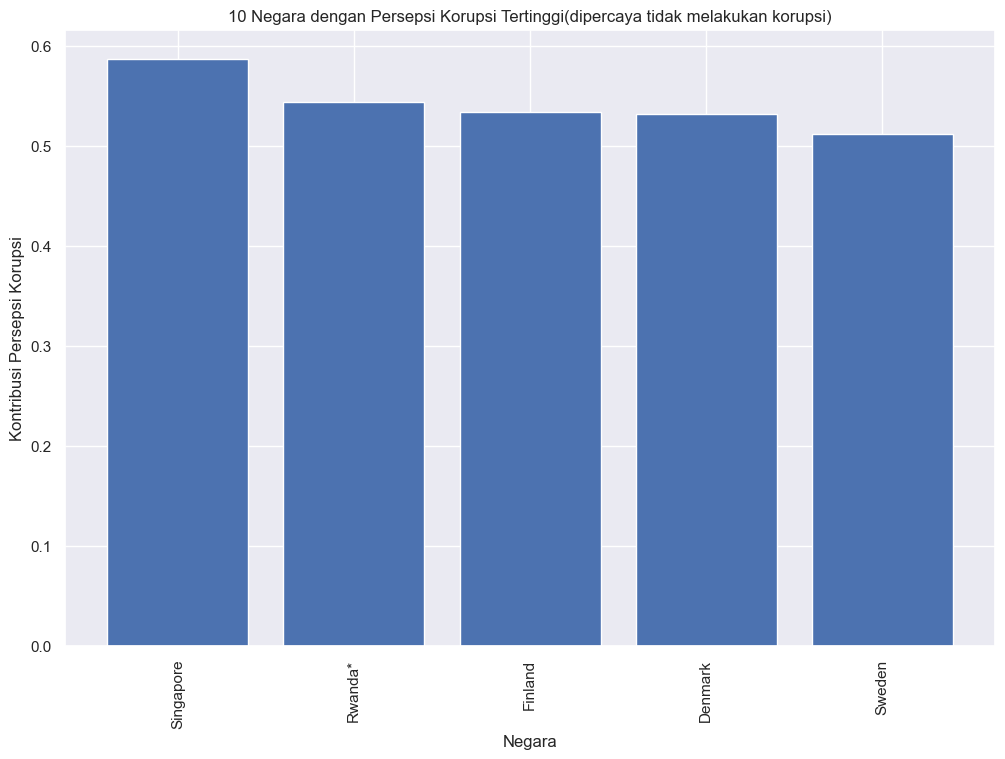

In [54]:
import matplotlib.pyplot as plt

# Mengurutkan data berdasarkan kontribusi korupsi
sorted_data = data22.sort_values(by='Explained by: Perceptions of corruption', ascending=False)

# Mengambil 10 negara dengan tingkat korupsi tertinggi
top_10_corrupt_countries = sorted_data.head(5)

# Plot bar untuk menampilkan 10 negara dengan tingkat korupsi tertinggi
plt.figure(figsize=(12, 8))
plt.bar(top_10_corrupt_countries['Country'], top_10_corrupt_countries['Explained by: Perceptions of corruption'])
plt.xticks(rotation=90)
plt.xlabel('Negara')
plt.ylabel('Kontribusi Persepsi Korupsi')
plt.title('10 Negara dengan Persepsi Korupsi Tertinggi(dipercaya tidak melakukan korupsi)')
plt.show()

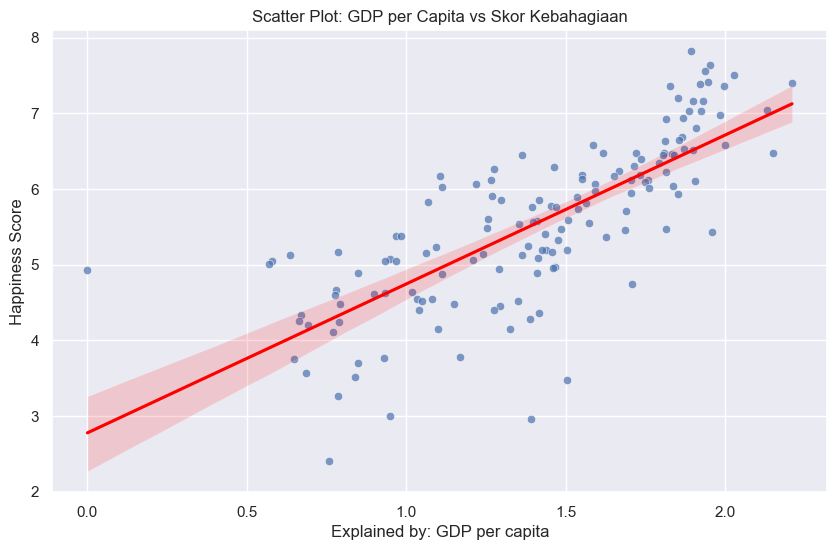

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat scatter plot dan menambahkan garis tren
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data22, x='Explained by: GDP per capita', y='Happiness score', alpha=0.7)
sns.regplot(data=data22, x='Explained by: GDP per capita', y='Happiness score', scatter=False, color='red')
plt.title('Scatter Plot: GDP per Capita vs Skor Kebahagiaan')
plt.xlabel('Explained by: GDP per capita')
plt.ylabel('Happiness Score')
plt.show()


In [26]:
import plotly.express as px

fig = px.imshow(data22.corr(), text_auto=True, color_continuous_scale='Viridis', aspect='auto', title='<b>Correlation matrix')
fig.update_layout(title_x=0.5)
fig.show()

C:\Users\Zahra Sevilla\AppData\Local\Temp\ipykernel_7572\2570936505.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

